In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn
#from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import cv2
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import norm
from openml import tasks, flows, runs, datasets, config
import random
from sklearn.pipeline import Pipeline
import pandasql as psql


In [2]:
def getRGB(loc):
    img = cv2.imread("./dataset/test/735902.jpg")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

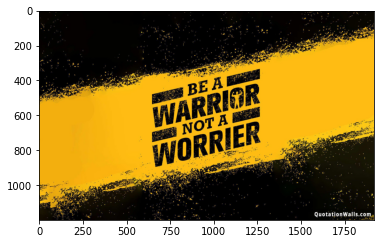

In [3]:
img = getRGB("./dataset/test/735902.jpg")
plt.imshow(img)

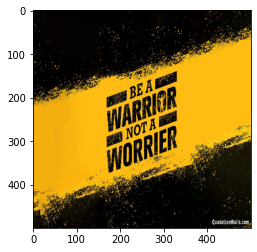

In [4]:
img = cv2.resize(img, (500,500))
plt.imshow(img)

In [5]:
def rgb_to_hex(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

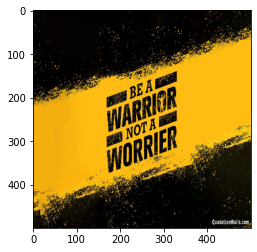

In [6]:
modified_image = cv2.resize(img,(500,500), interpolation=cv2.INTER_AREA)
plt.imshow(modified_image)

In [7]:
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [8]:
km = KMeans(n_clusters=20)
predicted = km.fit_predict(modified_image)
predicted

In [ ]:
df = modified_image
# df["prediction"] = predicted
# df.head()

In [ ]:
center_colors = km.cluster_centers_
center_colors

array([[254.08701827, 188.34184481,  18.67228345],
       [ 11.92543149,   8.55888243,   2.42271384],
       [243.62333362, 176.83920014,  14.55741919],
       [145.38362396, 128.54890068,  79.25170584],
       [ 71.72552273,  54.35479588,  22.66910056],
       [  1.73642477,   1.21734672,   0.71143252],
       [174.29379761, 136.34711643,  34.71817193],
       [188.04278922, 172.27099842, 118.4770206 ],
       [ 49.7851971 ,  31.62107804,   8.00294985],
       [240.15050167, 240.11036789, 238.74916388],
       [105.17729784,  76.752888  ,  18.42139628],
       [228.48131229, 187.74377076,  66.18729236],
       [ 98.58724058,  86.95388163,  58.55726364],
       [ 28.99541284,  22.63119266,  26.09266055],
       [137.54933196, 106.44347379,  31.09146968],
       [ 24.377824  ,  18.33486337,   5.10098257],
       [  9.99873471,   7.11377056,  16.39561367],
       [219.82237339, 168.93386243,  27.13907785],
       [243.99697946, 191.4140153 ,  36.53302457],
       [196.06677614, 161.41160

In [ ]:
count = {
            0: 0,
            1: 0, 
            2: 0,
        }
for i in predicted:
    count[i]+=1

count

KeyError: 4

In [ ]:
ordered_colors = [center_colors[i] for i in count.keys()]
hex_colors = [rgb_to_hex(ordered_colors[i]) for i in count.keys()]
hex_colors

['#080603', '#f8b915', '#7a6228']

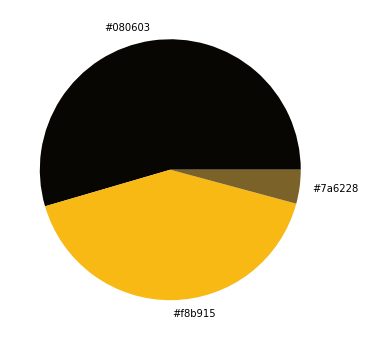

In [ ]:
plt.figure(figsize = (8, 6))
plt.pie(count.values(), labels = hex_colors, colors = hex_colors)
plt.show()